In [1]:
import numpy as np
import pandas as pd
import Strategies 
import Strategy_Analysis_Tool 
from binance.client import Client
from matplotlib import pyplot as plt


In [2]:
# Get data
symbol = "ETHUSDT"
timeFrame = "1h"
startDate = "2017-01-01"
endDate = "2022-08-28"
client = Client()
bars = client.get_historical_klines(symbol=symbol,interval=timeFrame,start_str=startDate, end_str = endDate)
df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
df["date"]=pd.to_datetime(df["timestamp"],unit="ms").astype(str)
df = df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
df["open"] = pd.to_numeric(df["open"])
df["high"] = pd.to_numeric(df["high"])
df["low"] = pd.to_numeric(df["low"])
df["close"] = pd.to_numeric(df["close"])
df["volume"] = pd.to_numeric(df["volume"])
df

,open,high,low,close,volume,date
0,301.13,302.57,298.00,301.61,125.66877,2017-08-17 04:00:00
1,301.61,303.28,300.00,303.10,377.67246,2017-08-17 05:00:00
2,302.40,304.44,301.90,302.68,303.86672,2017-08-17 06:00:00
3,302.68,307.96,302.60,307.96,754.74510,2017-08-17 07:00:00
4,307.95,309.97,307.00,308.62,150.75029,2017-08-17 08:00:00
...,...,...,...,...,...,...
43953,1479.62,1482.66,1473.22,1480.97,14303.76290,2022-08-27 20:00:00
43954,1480.97,1482.53,1457.66,1462.77,13224.47410,2022-08-27 21:00:00
43955,1462.77,1498.75,1457.89,1484.23,39197.19140,2022-08-27 22:00:00
43956,1484.22,1498.72,1481.63,1491.06,21548.46470,2022-08-27 23:00:00


In [3]:
# SMA strategy
sma_parameters = {
    "name":"EMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.1,                                     ## float
    "long_period": 156,                               ## long period of SMA curve
    "short_period": 21,                               ## short period of SMA curve
    "trading_logistic":"both",                        ## "long", "short", "both"
    "trading_unit": "all_in"                          ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)

*--------------------------------*
strategy: EMA
expected return: 35.03569777998612
sharpe ratio: 0.4415642992573624


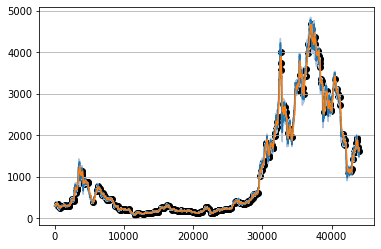

*--------------------------------*
strategy: EMA
trading count: 431
profit: -70.7538755554865
MDD: 0.5681875897594131


In [4]:
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(sma, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", sma.name)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)
profit, trading_count, buy_record, sell_record, MDD = sma.back_test(df)
print("*--------------------------------*")
print("strategy:", sma.name)
print("trading count:", trading_count)
print("profit:", profit * 100)
print("MDD:", MDD)

In [5]:
# SMA strategy
sma_parameters = {
    "name":"EMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.1,                                     ## float
    "long_period": 162,                               ## long period of SMA curve
    "short_period": 22,                               ## short period of SMA curve
    "trading_logistic":"both",                        ## "long", "short", "both"
    "trading_unit": "all_in"                          ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)

*--------------------------------*
strategy: EMA
expected return: 46.18067387377111
sharpe ratio: 0.6319905192532972


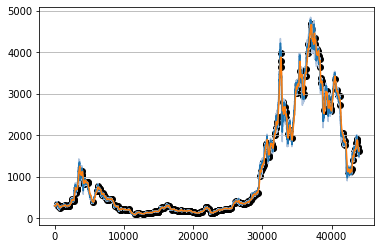

*--------------------------------*
strategy: EMA
trading count: 415
profit: 53.075131069514015
MDD: 0.689801690833862


In [6]:
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(sma, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", sma.name)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)
profit, trading_count, buy_record, sell_record, MDD = sma.back_test(df)
print("*--------------------------------*")
print("strategy:", sma.name)
print("trading count:", trading_count)
print("profit:", profit * 100)
print("MDD:", MDD)

# Brute force and find the best parameters

In [7]:
# SMA strategy
sma_parameters = {
    "name":"EMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.001,                                   ## float
    "long_period": 100,                               ## long period of SMA curve
    "short_period": 30,                               ## short period of SMA curve
    "trading_logistic":"both",                        ## "long", "short", "both"
    "trading_unit": "all_in"                          ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)

In [8]:
index = 0
sharpe = []
expected = []
for long_period in range(50, 300):
    for short_period in range(5, 40):
        sma_parameters["long_period"] = long_period
        sma_parameters["short_period"] = short_period
        sma = Strategies.SMA(sma_parameters)

        sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(sma, df, 0.02, window_size=10000, window_off=1000)
        # print("*--------------------------------*")
        # print("index:", index)
        # print("strategy:", sma.name)
        # print("long_period:", sma.long_period)
        # print("short_period:", sma.short_period)
        # print("expected return:", expected_return * 100)
        # print("sharpe ratio:", sharpe_ratio)
        sharpe.append(sharpe_ratio)
        expected.append(expected_return)
        index += 1

In [9]:
print(np.argmax(expected), np.argmax(sharpe))
expected_index = np.argmax(expected)
sharpe_index = np.argmax(sharpe)
print(np.max(expected) * 100)
print(np.max(sharpe))

1470 3781
366.7219613579214
1.634924707730589


In [10]:
exp_l, exp_s = 0, 0
sha_l, sha_s = 0, 0
index = 0
l = 0
for long_period in range(50, 300):
    s = 0
    for short_period in range(5, 40):
        if (index == expected_index):
            exp_l, exp_s = long_period, short_period
            print("exp", exp_l, exp_s)
        if (index == sharpe_index):
            sha_l, sha_s = long_period, short_period
            print("sha", sha_l, sha_s)
        index += 1
        s += 1
    l += 1

exp 92 5
sha 158 6


In [11]:
# SMA strategy
sma_parameters = {
    "name":"EMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.001,                                   ## float
    "long_period": exp_l,                               ## long period of SMA curve
    "short_period": exp_s,                               ## short period of SMA curve
    "trading_logistic":"both",                        ## "long", "short", "both"
    "trading_unit": "all_in"                          ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)

In [12]:
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(sma, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", sma.name)
print("long_period:", sma.long_period)
print("short_period:", sma.short_period)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)

*--------------------------------*
strategy: EMA
long_period: 92
short_period: 5
expected return: 366.7219613579214
sharpe ratio: 0.7668260482288937


In [13]:
# SMA strategy
sma_parameters = {
    "name":"EMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.001,                                   ## float
    "long_period": sha_l,                               ## long period of SMA curve
    "short_period": sha_s,                               ## short period of SMA curve
    "trading_logistic":"both",                        ## "long", "short", "both"
    "trading_unit": "all_in"                          ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)

In [14]:
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(sma, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", sma.name)
print("long_period:", sma.long_period)
print("short_period:", sma.short_period)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)

*--------------------------------*
strategy: EMA
long_period: 158
short_period: 6
expected return: 154.34380457472233
sharpe ratio: 1.634924707730589


In [15]:
Expected_Return = np.array(expected)
Sharpe_Ratio = np.array(sharpe)
R = Expected_Return.reshape([250, 35])
S = Sharpe_Ratio.reshape([250, 35])

366.7219613579214


Text(0.5, 0, 'Expected Return (%)')

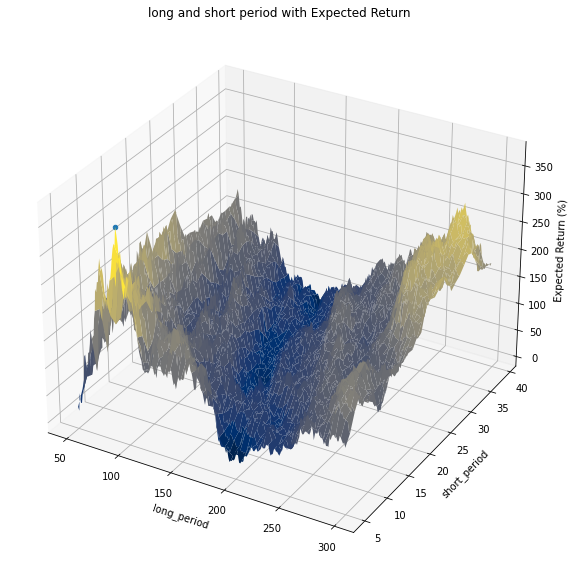

In [16]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
 
long_period = list(range(50, 300))
short_period = list(range(5, 40))
X, Y = np.meshgrid(long_period, short_period)

three_dim_R = R
Z = np.transpose(three_dim_R) * 100
print(np.max(Z))

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.scatter(exp_l, exp_s, np.max(Z))
ax.set_title('long and short period with Expected Return')
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
ax.set_xlabel("long_period")
ax.set_ylabel("short_period")
ax.set_zlabel("Expected Return (%)")

1.634924707730589


Text(0.5, 0, 'Sharpe Ratio')

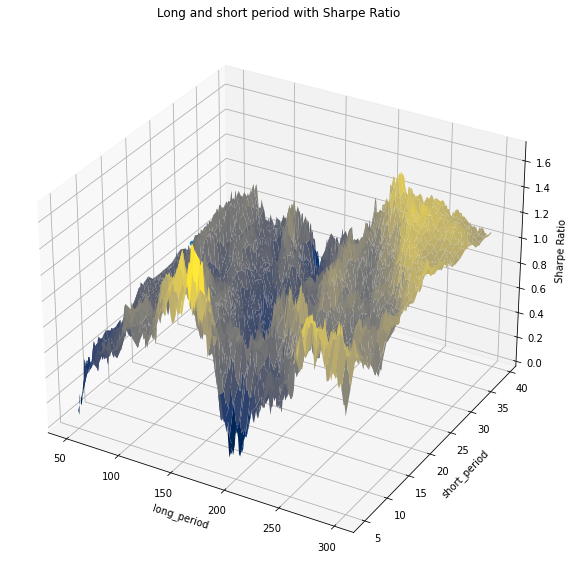

In [17]:
long_period = list(range(50, 300))
short_period = list(range(5, 40))
X, Y = np.meshgrid(long_period, short_period)

three_dim_R = S
Z = np.transpose(three_dim_R) 
print(np.max(Z))

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.scatter(sha_l, sha_s, np.max(Z))
ax.set_title('Long and short period with Sharpe Ratio')
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
ax.set_xlabel("long_period")
ax.set_ylabel("short_period")
ax.set_zlabel("Sharpe Ratio")